# 課題8. 図形の輪郭線の長さの計算

1. ソースコードを改変し，画像中の6つの各図形の輪郭線の長さを計算しなさい．
        一度の実行で6つの面積を一気に計算するプログラムである必要はありません．値を変え，6回実行する形式で構いません．
2. !レポート!　作成したプログラムによってどのような処理が行われているのかを分かりやすく説明しなさい．

処理前のヒストグラム


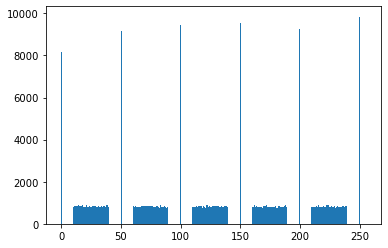

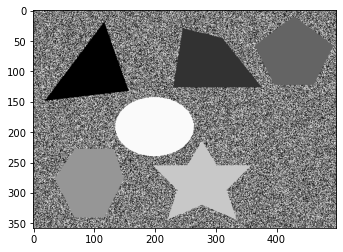

1つ目の処理後の画像


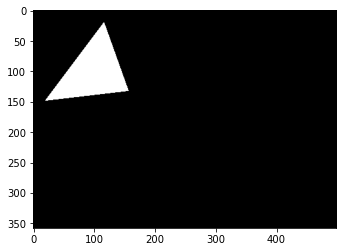

1つ目の処理後の画像


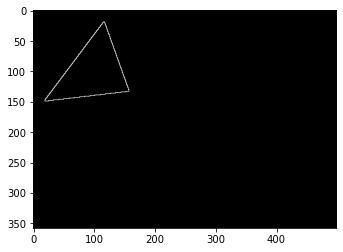

1つ目の図形の輪郭線の長さ：536[px]
//---------------------------------------------------------------//
2つ目の処理後の画像


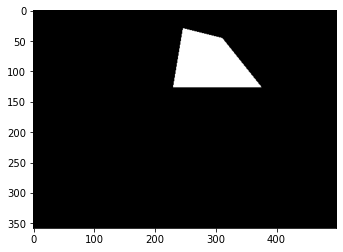

2つ目の処理後の画像


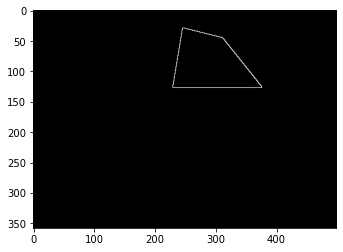

2つ目の図形の輪郭線の長さ：488[px]
//---------------------------------------------------------------//
3つ目の処理後の画像


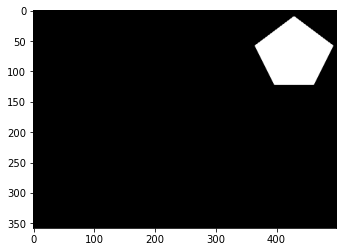

3つ目の処理後の画像


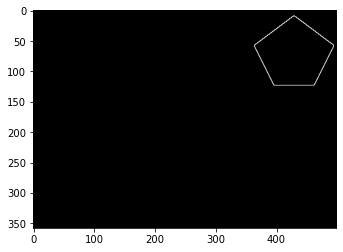

3つ目の図形の輪郭線の長さ：488[px]
//---------------------------------------------------------------//
4つ目の処理後の画像


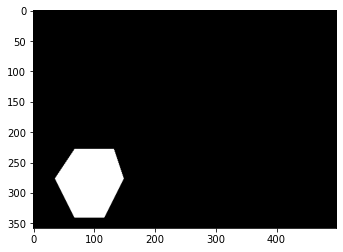

4つ目の処理後の画像


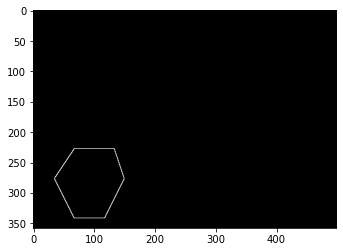

4つ目の図形の輪郭線の長さ：456[px]
//---------------------------------------------------------------//
5つ目の処理後の画像


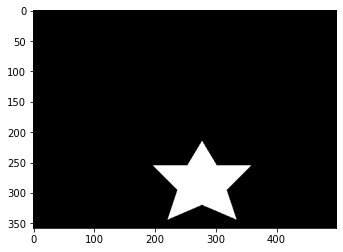

5つ目の処理後の画像


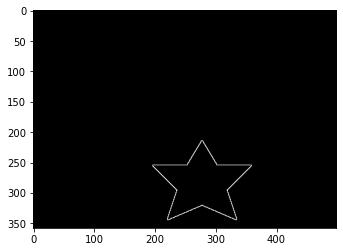

5つ目の図形の輪郭線の長さ：696[px]
//---------------------------------------------------------------//
6つ目の処理後の画像


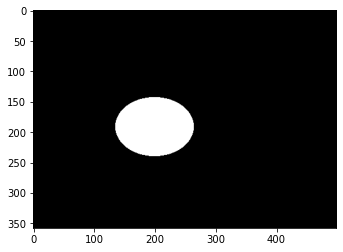

6つ目の処理後の画像


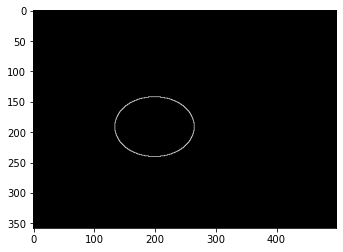

6つ目の図形の輪郭線の長さ：456[px]
//---------------------------------------------------------------//


In [1]:
from pylab import *
from cv2 import imread
import copy

# 図形の色を白、背景色を黒に書き換える
def change_background_color(key, gazo):
    for y in range(0,358):
        for x in range(0,499):
            ######### ここを変更 ############
            if gazo[y][x] == key:
                gazo[y][x] = 255
            else:
                gazo[y][x] = 0
            ##################################
    return gazo

# 輪郭線の長さを計算
def calc_line(index, key, gazo):
    print(str(index) + "つ目の処理後の画像")
    imshow(gazo, cmap="gray", vmin=0, vmax=255)
    show()

    length = 0
    gazo3 = zeros( (358,499) )
    for y in range(1,357):
        for x in range(1,498):
            ######### ここを変更 ############
            filter = [
                [1.0, 1.0, 1.0],
                [1.0, -8.0, 1.0],
                [1.0, 1.0, 1.0]
            ]
            ##################################

            pixel_rate = 0
            for xx in range(3):
                for yy in range(3):
                    pixel_rate += gazo[y + yy - 1][x + xx - 1] * filter[yy][xx]

            # 0〜255の範囲内に収める 
            pixel_rate = int(pixel_rate) 
            if pixel_rate < 0:
                pixel_rate = 0
            elif pixel_rate > 255:
                pixel_rate = 255
            gazo3[y][x] = pixel_rate

            if gazo3[y][x] == 255:
                length += 1

    print(str(index) + "つ目の処理後の画像")
    imshow(gazo3, cmap="gray", vmin=0, vmax=255)
    show()

    print(str(index) + "つ目の図形の輪郭線の長さ：" + str(length) + '[px]')
    print("//---------------------------------------------------------------//")
    return gazo



# ローカルディレクトリにDLした画像を読み込み
gazo = imread( "kadai8.bmp", 0 )
cnt = zeros(256)
area = {}
gazo1 = copy.deepcopy(gazo)
gazo2 = copy.deepcopy(gazo)
gazo3 = copy.deepcopy(gazo)
gazo4 = copy.deepcopy(gazo)
gazo5 = copy.deepcopy(gazo)
gazo6 = copy.deepcopy(gazo)


# ヒストグラムを表示
print("処理前のヒストグラム")
hist( gazo.flatten(), 256, (0,255) )
show()
imshow(gazo, cmap="gray", vmin=0, vmax=255)
show()

# 数値化された画像データから値毎の出現数を計数する
for y in range(0,358):
    for x in range(0,499):
        cnt[gazo[y][x]] += 1

# 孤立した値を固有の図形として面積として計数する
for i, x in enumerate(cnt):
    if cnt[i] != 0 and cnt[i - 1] == 0 and cnt[i + 1] == 0:
        area[i] = x

# 課題： 6つの図形の輪郭線の長さ（画素数）を計算しなさい．
#      レポートでは計算方法を分かりやすく説明しなさい．
# ヒント：　二段階の処理が必要．．．
# 図形の色を白、背景色を黒に書き換える
for key in area.keys():
    ######### ここを変更 ############
    if key == 0:
        gazo1 = change_background_color(key, gazo1)
    elif key == 50:
        gazo2 = change_background_color(key, gazo2)
    elif key == 100:
        gazo3 = change_background_color(key, gazo3)
    elif key == 150:
        gazo4 = change_background_color(key, gazo4)
    elif key == 200:
        gazo5 = change_background_color(key, gazo5)
    elif key == 250:
        gazo6 = change_background_color(key, gazo6)
    ##################################

# 輪郭線の長さを計算
for key in area.keys():
    if key == 0:
        gazo1 = calc_line(1, key, gazo1)
    elif key == 50:
        gazo2 = calc_line(2, key, gazo2)
    elif key == 100:
        gazo3 = calc_line(3, key, gazo3)
    elif key == 150:
        gazo4 = calc_line(4, key, gazo4)
    elif key == 200:
        gazo5 = calc_line(5, key, gazo5)
    elif key == 250:
        gazo6 = calc_line(6, key, gazo6)

In [ ]:
### 